<div style="
  background: linear-gradient(135deg, #667eea, #764ba2);
  color: white;
  padding: 25px;
  border-radius: 12px;
  text-align: center;
  font-family: Arial, sans-serif;
">
  <h1>📊 Sentiment Analysis of YouTube Comments using NLP</h1>
  <p style="font-size: 18px; margin-top: 10px;">
    An NLP-based project to analyze audience opinions and classify YouTube comments
    into <b>Positive</b>, <b>Negative</b>, and <b>Neutral</b> sentiments.
  </p>
</div>


## 1] Import Required Libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2] Load Dataset.

In [2]:
df=pd.read_csv('YoutubeCommentsDataSet.csv')
df

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


## 3] Data Cleaning (Handling Missing Data).

In [3]:
# Dataset size before cleaning.
df.shape

(18408, 2)

In [4]:
# Check missing values.
df.isnull().sum()

Comment      44
Sentiment     0
dtype: int64

In [5]:
# Remove missing comments
df.dropna(subset=['Comment'],inplace=True)    # Removes rows where comment value is NaN.

In [6]:
# Remove empty comments
df = df[df['Comment'].str.strip() != ""]    # Deletes rows where comment is empty ("") or only spaces.

In [7]:
# Dataset size after cleaning
print("After cleaning:",df.shape)

After cleaning: (18364, 2)


In [8]:
# Verify missing values
print(df.isnull().sum())

Comment      0
Sentiment    0
dtype: int64


## 4] Text Preprocessing.

In [9]:
# Import Required Libraries for Text Cleaning.

import re                                    # For regex (removing URLs, punctuation, numbers)
import nltk                                  # NLP library
from nltk.corpus import stopwords            # Stopword list
from nltk.tokenize import word_tokenize      # Tokenizer to split text
from nltk.stem import WordNetLemmatizer      # Lemmatizer

In [10]:
stop_words = set(stopwords.words('english'))     # set() makes lookups faster.
lemmatizer = WordNetLemmatizer()                 # Converts words to their base form (e.g., “running” → “run”)
          
def preprocess_text(text):
    text = text.lower()                              # Lowercase
    text = re.sub(r"http\S+|www\S+", "", text)       # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)             # Remove punctuation/numbers
    tokens = word_tokenize(text)                     # Tokenization(Splits text into individual words (tokens).)
    tokens = [lemmatizer.lemmatize(word)             # Lemmatization
              for word in tokens if word not in stop_words]
    return " ".join(tokens)                          # Combines the cleaned tokens back into a single string.

In [11]:
# Apply cleaning to all comments.
df['clean_comment'] = df['Comment'].apply(preprocess_text)
df.head()

,Comment,Sentiment,clean_comment
0,lets not forget that apple pay in 2014 require...,neutral,let forget apple pay required brand new iphone...
1,here in nz 50 of retailers don’t even have con...,negative,nz retailer dont even contactless credit card ...
2,i will forever acknowledge this channel with t...,positive,forever acknowledge channel help lesson idea e...
3,whenever i go to a place that doesn’t take app...,negative,whenever go place doesnt take apple pay doesnt...
4,apple pay is so convenient secure and easy to ...,positive,apple pay convenient secure easy use used kore...


## 5] Create Sentiment Labels

In [12]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity    # It tells us how positive or how negative a sentence is(range -1 to +1).
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['clean_comment'].apply(get_sentiment)
df.head()

,Comment,Sentiment,clean_comment,sentiment
0,lets not forget that apple pay in 2014 require...,neutral,let forget apple pay required brand new iphone...,positive
1,here in nz 50 of retailers don’t even have con...,negative,nz retailer dont even contactless credit card ...,positive
2,i will forever acknowledge this channel with t...,positive,forever acknowledge channel help lesson idea e...,neutral
3,whenever i go to a place that doesn’t take app...,negative,whenever go place doesnt take apple pay doesnt...,negative
4,apple pay is so convenient secure and easy to ...,positive,apple pay convenient secure easy use used kore...,positive


#### Data Balance vs Imbalance

In [13]:
# Sentiment distribution
df['sentiment'].value_counts()

sentiment
positive    11797
neutral      4255
negative     2312
Name: count, dtype: int64

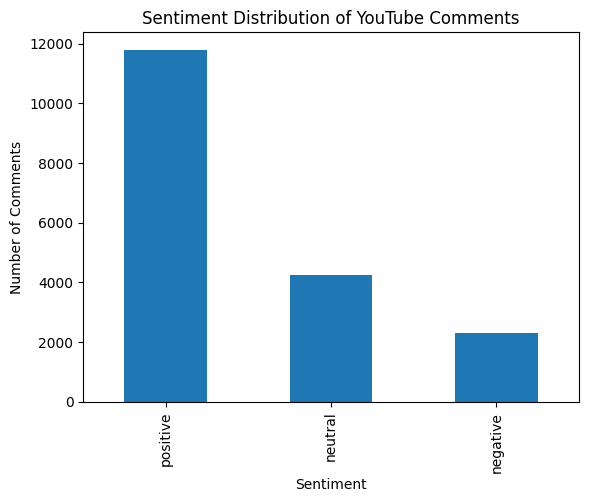

In [14]:
# Sentiment Distribution Visualization
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution of YouTube Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()

<div style="background-color:#f3f7ff; padding:15px; border-left:6px solid #4c6ef5; border-radius:6px">

<b>⚖️ Class Imbalance Handling</b><br><br>
Since the dataset is imbalanced, class weights were applied in Logistic Regression after TF-IDF vectorization to give equal importance to all sentiment classes without modifying the data distribution.

</div>


## 6] Split Data (Train & Test)

In [15]:
X = df['clean_comment']
y = df['sentiment']

In [16]:
X

0        let forget apple pay required brand new iphone...
1        nz retailer dont even contactless credit card ...
2        forever acknowledge channel help lesson idea e...
3        whenever go place doesnt take apple pay doesnt...
4        apple pay convenient secure easy use used kore...
                               ...                        
18403    really like point engineering toolbox think th...
18404    ive started exploring field really good remind...
18405    excelente video con una pregunta filosfica pro...
18406    hey daniel discovered channel couple day ago i...
18407    great focus key playful approach also speed th...
Name: clean_comment, Length: 18364, dtype: object

In [17]:
y

0        positive
1        positive
2         neutral
3        negative
4        positive
           ...   
18403    positive
18404    positive
18405    negative
18406     neutral
18407    positive
Name: sentiment, Length: 18364, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

(14691,) (14691,)


## 7] Feature Extraction.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Bag of Words(alternative).
#vectorizer = CountVectorizer()
#X_train_vec = vectorizer.fit_transform(X_train)
#X_test_vec = vectorizer.transform(X_test)

## 8] Train ML Model (Logistic Regression)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 9] Predictions.

In [21]:
y_pred = model.predict(X_test_tfidf)
y_pred

array(['neutral', 'positive', 'positive', ..., 'negative', 'positive',
       'positive'], shape=(3673,), dtype=object)

## 10] Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.848625102096379

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.74      0.65       425
     neutral       0.74      0.92      0.82       798
    positive       0.96      0.85      0.90      2450

    accuracy                           0.85      3673
   macro avg       0.76      0.83      0.79      3673
weighted avg       0.87      0.85      0.85      3673



#### Confusion Matrix:

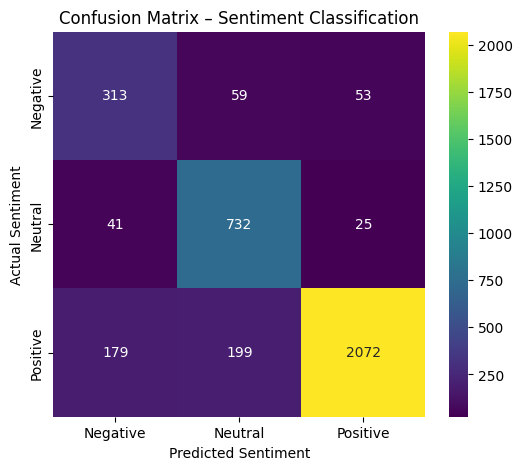

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Negative', 'Neutral', 'Positive']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis',xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("Confusion Matrix – Sentiment Classification")
plt.show()

## 11] Test on New Comments

In [24]:
def predict_sentiment(comment):
    clean = preprocess_text(comment)
    vector = vectorizer.transform([clean])
    return model.predict(vector)[0]

predict_sentiment("This video is amazing 🔥")

'positive'